In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import itertools


from iarchitect import envs,trainer as trainer_iarch
from iarchitect.agents import dqn as dqn_iarch
from iarchitect.common import show_policy_behaviour,create_policy_eval_video
from iarchitect.common.callbacks import output_updater,update_plotter,fig_trainer

from tf_agents.agents import DdpgAgent,DqnAgent,PPOAgent,PPOClipAgent
from tf_agents.agents.ppo.ppo_actor_network import PPOActorNetwork
from tf_agents.networks.value_network import ValueNetwork
from tf_agents.networks.actor_distribution_network import ActorDistributionNetwork
from tf_agents.environments import ActionDiscretizeWrapper

from tf_agents.utils import common
from tf_agents import networks
from tf_agents.networks import sequential
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts
from tf_agents.metrics import py_metrics,tf_metrics
from tf_agents.drivers import py_driver,dynamic_episode_driver,dynamic_step_driver
from tf_agents.policies import random_py_policy,random_tf_policy,PyTFEagerPolicy
from tf_agents.replay_buffers import tf_uniform_replay_buffer,py_uniform_replay_buffer

from tensorflow import Tensor,Variable
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras import initializers

2022-03-07 23:20:48.378978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 23:20:48.379017: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
SOLUTION_NAME = "WindowEnvWhatPlantPPO"

In [8]:
environment = envs.WindowEnv(16,np.fromiter(range(10),dtype=int),render_dims=(4,4),max_species_reset=5,action_float=True,action_shape_one=True)
utils.validate_py_environment(environment, episodes=5)
train_env = tf_py_environment.TFPyEnvironment(environment)

In [9]:
train_env.action_spec()

BoundedTensorSpec(shape=(1,), dtype=tf.float32, name='action', minimum=array(0., dtype=float32), maximum=array(9.4999, dtype=float32))

In [15]:
#actor_net=ActorDistributionNetwork(train_env.observation_spec(),train_env.action_spec())
actor_net = PPOActorNetwork().create_sequential_actor_net((64,64),train_env.action_spec())
agent = PPOAgent(
        train_env.time_step_spec(),
        train_env.action_spec(),
        optimizer=Adam(learning_rate=0.0005),
        actor_net=actor_net,
        value_net=ValueNetwork(train_env.observation_spec()),
        )
agent.initialize()

In [16]:
def plot_obs(obs,ax):
    return ax.imshow(obs,vmin=0.0,vmax=1.0)

def plot_traj(tr,ax):
    return ax.imshow(tr)

def evaluate_policy(each_step=1,n_epochs=5):
    def evaluate_(step,trainer):
        if step % each_step == 0:
            for _ in range(n_epochs):
                time_step = trainer.tf_env.reset()
                while not time_step.is_last():
                    print(trainer.tf_env.envs[0].render())
                    action_step = trainer.agent.policy.action(time_step)
                    time_step = trainer.tf_env.step(action_step.action)
                display(trainer.tf_env.envs[0].render())
                display("----------- end --------------")
    return evaluate_

In [17]:
trainer = trainer_iarch.Trainer(train_env,agent)
trainer.initialize_buffer(min_size=640,random_policy=False)

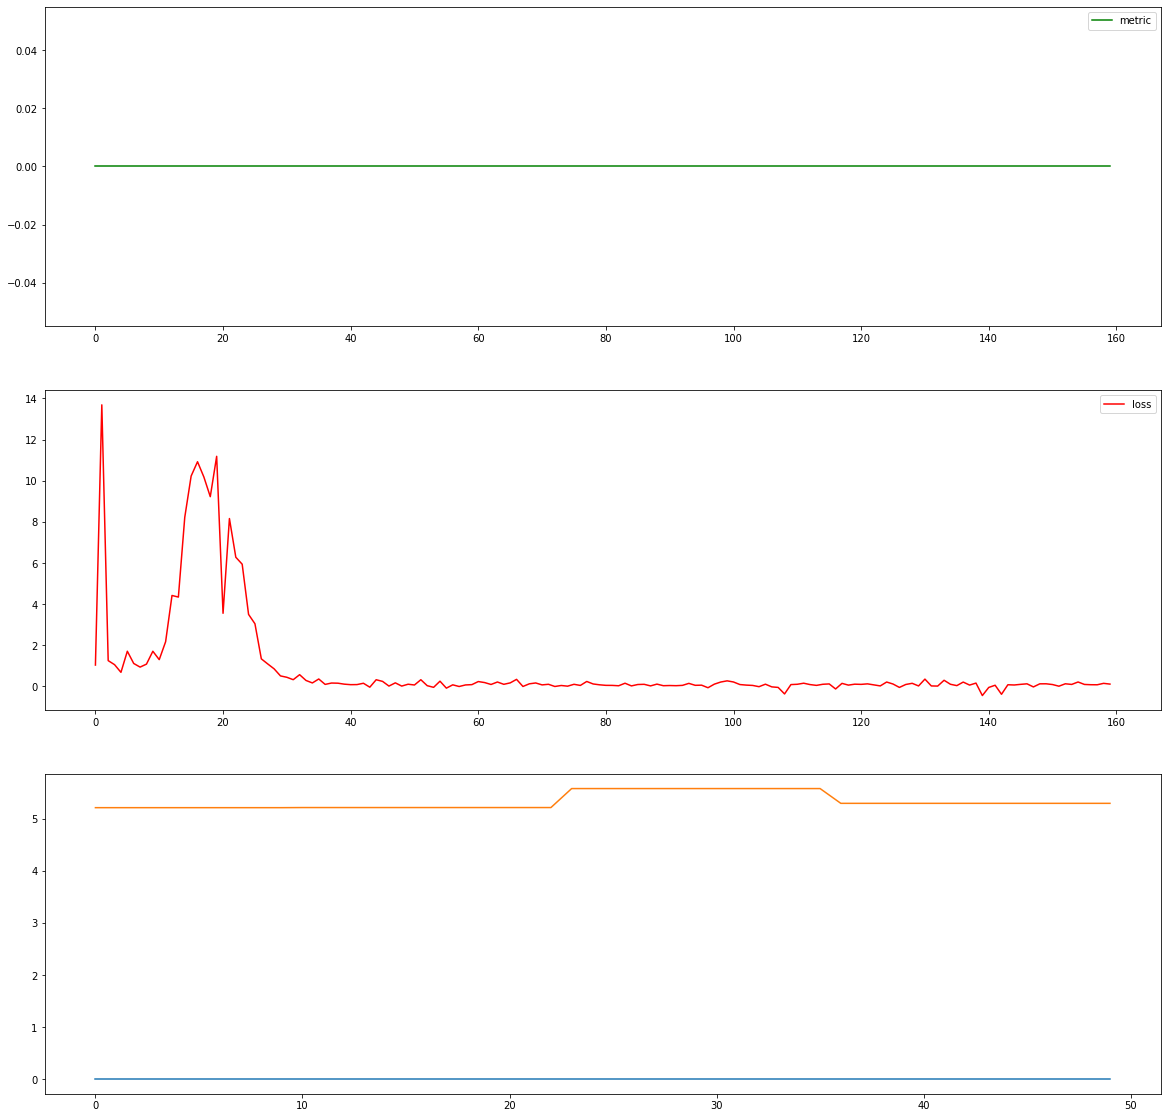

🟩 🟩 🟩 🟩
🟩 🟩 🧄 🥦
🥬 🟩 🥑 🥦
🟩 🟩 🟩 🟩
Last :   -> R : 0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :  33% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🟩 🟩 🟩
🟩 🟩 🧄 🥦
🥬 🟩 🥑 🥦
🟩 🟩 🟩 🟩
Last : 🌶️ @ [0],[0] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :  33% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🌶️ 🟩 🟩
🟩 🟩 🧄 🥦
🥬 🟩 🥑 🥦
🟩 🟩 🟩 🟩
Last : 🌶️ @ [0],[1] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :  33% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🌶️ 🌶️ 🟩
🟩 🟩 🧄 🥦
🥬 🟩 🥑 🥦
🟩 🟩 🟩 🟩
Last : 🌶️ @ [0],[2] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :  33% 🥦 : 1

'🌶️ 🌶️ 🌶️ 🌶️\n🌶️ 🌶️ 🧄 🥦\n🥬 🌶️ 🥑 🥦\n🌶️ 🌶️ 🌶️ 🌶️\nLast : 🌶️ @ [3],[3] -> R : 0.0\nQuotas : \n🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2\n🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1\nRemplissage : \n🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :   0%\n🌶️ : 100% 🥒 : 100% 🥬 :  33% 🥦 : 100% 🧄 : 100%\nRendement : 3.00 € '

'----------- end --------------'

🟩 🟩 🟩 🟩
🥦 🟩 🟩 🌽
🟩 🥑 🟩 🟩
🟩 🟩 🟩 🌶️
Last :   -> R : 0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :  50%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 :   0%
Rendement : 2.00 € 
🌶️ 🟩 🟩 🟩
🥦 🟩 🟩 🌽
🟩 🥑 🟩 🟩
🟩 🟩 🟩 🌶️
Last : 🌶️ @ [0],[0] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :  50%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 :   0%
Rendement : 2.00 € 
🌶️ 🌶️ 🟩 🟩
🥦 🟩 🟩 🌽
🟩 🥑 🟩 🟩
🟩 🟩 🟩 🌶️
Last : 🌶️ @ [0],[1] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :  50%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 :   0%
Rendement : 2.00 € 
🌶️ 🌶️ 🌶️ 🟩
🥦 🟩 🟩 🌽
🟩 🥑 🟩 🟩
🟩 🟩 🟩 🌶️
Last : 🌶️ @ [0],[2] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :  50%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦

'🌶️ 🌶️ 🌶️ 🌶️\n🥦 🌶️ 🌶️ 🌽\n🌶️ 🥑 🌶️ 🌶️\n🌶️ 🌶️ 🌶️ 🌶️\nLast : 🌶️ @ [3],[2] -> R : 0.0\nQuotas : \n🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2\n🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1\nRemplissage : \n🥑 :  50% 🍆 :   0% 🥔 :   0% 🥕 :   0% 🌽 :  50%\n🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 :   0%\nRendement : 2.00 € '

'----------- end --------------'

🟩 🟩 🟩 🟩
🍆 🟩 🌶️ 🟩
🥑 🟩 🟩 🟩
🟩 🟩 🧄 🟩
Last :   -> R : 0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 : 100% 🥔 :   0% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🟩 🟩 🟩
🍆 🟩 🌶️ 🟩
🥑 🟩 🟩 🟩
🟩 🟩 🧄 🟩
Last : 🌶️ @ [0],[0] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 : 100% 🥔 :   0% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🌶️ 🟩 🟩
🍆 🟩 🌶️ 🟩
🥑 🟩 🟩 🟩
🟩 🟩 🧄 🟩
Last : 🌶️ @ [0],[1] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 : 100% 🥔 :   0% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🌶️ 🌶️ 🟩
🍆 🟩 🌶️ 🟩
🥑 🟩 🟩 🟩
🟩 🟩 🧄 🟩
Last : 🌶️ @ [0],[2] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 : 100% 🥔 :   0% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦

'🌶️ 🌶️ 🌶️ 🌶️\n🍆 🌶️ 🌶️ 🌶️\n🥑 🌶️ 🌶️ 🌶️\n🌶️ 🌶️ 🧄 🌶️\nLast : 🌶️ @ [3],[3] -> R : 0.0\nQuotas : \n🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2\n🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1\nRemplissage : \n🥑 :  50% 🍆 : 100% 🥔 :   0% 🥕 :   0% 🌽 :   0%\n🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%\nRendement : 3.00 € '

'----------- end --------------'

🟩 🟩 🧄 🟩
🟩 🥒 🟩 🟩
🥔 🥕 🟩 🟩
🟩 🟩 🟩 🥦
Last :   -> R : 0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :   0% 🍆 :   0% 🥔 :  50% 🥕 :  50% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🟩 🧄 🟩
🟩 🥒 🟩 🟩
🥔 🥕 🟩 🟩
🟩 🟩 🟩 🥦
Last : 🌶️ @ [0],[0] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :   0% 🍆 :   0% 🥔 :  50% 🥕 :  50% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🌶️ 🧄 🟩
🟩 🥒 🟩 🟩
🥔 🥕 🟩 🟩
🟩 🟩 🟩 🥦
Last : 🌶️ @ [0],[1] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :   0% 🍆 :   0% 🥔 :  50% 🥕 :  50% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🌶️ 🌶️ 🧄 🌶️
🟩 🥒 🟩 🟩
🥔 🥕 🟩 🟩
🟩 🟩 🟩 🥦
Last : 🌶️ @ [0],[3] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :   0% 🍆 :   0% 🥔 :  50% 🥕 :  50% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 1

'🌶️ 🌶️ 🧄 🌶️\n🌶️ 🥒 🌶️ 🌶️\n🥔 🥕 🌶️ 🌶️\n🌶️ 🌶️ 🌶️ 🥦\nLast : 🌶️ @ [3],[2] -> R : 0.0\nQuotas : \n🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2\n🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1\nRemplissage : \n🥑 :   0% 🍆 :   0% 🥔 :  50% 🥕 :  50% 🌽 :   0%\n🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%\nRendement : 3.00 € '

'----------- end --------------'

🧄 🟩 🥑 🟩
🟩 🥔 🟩 🟩
🧄 🟩 🟩 🟩
🟩 🟩 🟩 🟩
Last :   -> R : 0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :  50% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🧄 🌶️ 🥑 🟩
🟩 🥔 🟩 🟩
🧄 🟩 🟩 🟩
🟩 🟩 🟩 🟩
Last : 🌶️ @ [0],[1] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :  50% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🧄 🌶️ 🥑 🌶️
🟩 🥔 🟩 🟩
🧄 🟩 🟩 🟩
🟩 🟩 🟩 🟩
Last : 🌶️ @ [0],[3] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :  50% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%
Rendement : 3.00 € 
🧄 🌶️ 🥑 🌶️
🌶️ 🥔 🟩 🟩
🧄 🟩 🟩 🟩
🟩 🟩 🟩 🟩
Last : 🌶️ @ [1],[0] -> R : 0.0
Quotas : 
🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2
🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1
Remplissage : 
🥑 :  50% 🍆 :   0% 🥔 :  50% 🥕 :   0% 🌽 :   0%
🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 1

'🧄 🌶️ 🥑 🌶️\n🌶️ 🥔 🌶️ 🌶️\n🧄 🌶️ 🌶️ 🌶️\n🌶️ 🌶️ 🌶️ 🌶️\nLast : 🌶️ @ [3],[3] -> R : 0.0\nQuotas : \n🥑 : 2 🍆 : 1 🥔 : 2 🥕 : 2 🌽 : 2\n🌶️ : 0 🥒 : 0 🥬 : 3 🥦 : 0 🧄 : 1\nRemplissage : \n🥑 :  50% 🍆 :   0% 🥔 :  50% 🥕 :   0% 🌽 :   0%\n🌶️ : 100% 🥒 : 100% 🥬 :   0% 🥦 : 100% 🧄 : 100%\nRendement : 3.00 € '

'----------- end --------------'

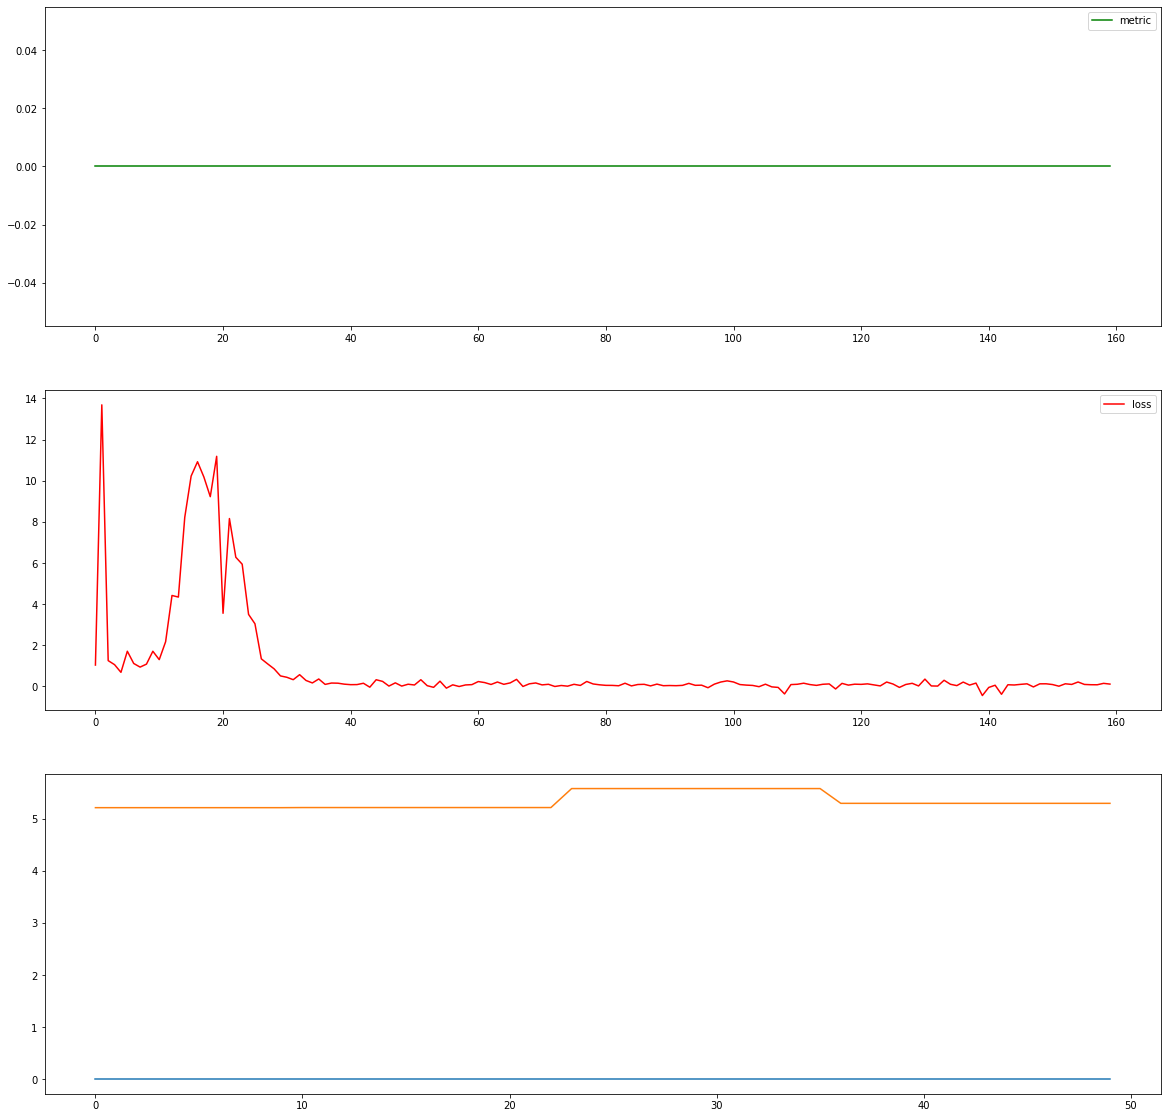

In [20]:
fig_tr = fig_trainer(3,1,figsize=(20,20))

callbacks = [update_plotter(fig_tr,plot_obs),
             output_updater(fig_tr,clear_output=True),
             evaluate_policy(n_epochs=5)
             ]

# callbacks = []
trainer.run(callbacks=callbacks,
            buffer_size_increase_per_iteration = 10,
            sample_batch_size_experience = 64,
            num_iterations_train = 10,
            num_steps_per_row_in_experience = 2
           )

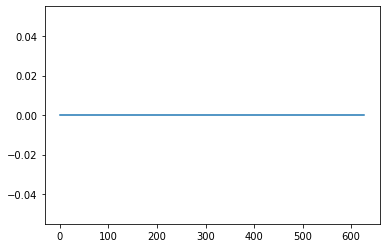

In [44]:
plt.plot(trainer.observer.rewards())

In [ ]:
fig_tr.savefig(SOLUTION_NAME+".png")

/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tf_agents/utils/common.py:1432: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return state is not None and state is not () and state is not []
/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tf_agents/utils/common.py:1432: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return state is not None and state is not () and state is not []
/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tf_agents/policies/tf_policy.py:252: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if policy_state is ():  # pylint: disable=literal-comparison
/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tf_agents/policies/tf_policy.py:314: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if not (policy_state is None or policy_state is () or policy_state is []):  # pylint: disable=literal-comparison
/home/maxime/.pyenv/versions/iarchitect/lib/python

KeyboardInterrupt: 

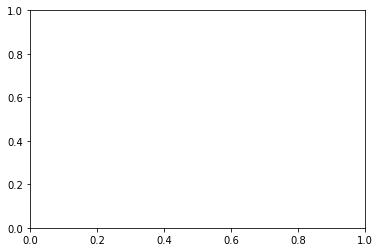

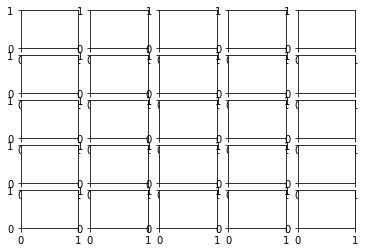

In [19]:
trainer.tf_env.reset()
fig,ax = plt.subplots()
fig2,axes_ = plt.subplots(5,5)
trainer.evaluate_agent(50)
obs=trainer.observer.observations()[-25:]
trainer.observer.plot_reward(ax=ax,slice_=slice(-25,None,None))
for o,ax_ in zip(obs,fig2.axes):
    res = plot_obs(o,ax_)
res

In [99]:
create_policy_eval_video(train_env,environment,trainer.agent.policy,SOLUTION_NAME,num_episodes=10,fps=5)

In [100]:
create_policy_eval_video(train_env,environment,random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),train_env.action_spec()),SOLUTION_NAME + "_random",num_episodes=10,fps=5)

(288, 432, 4)

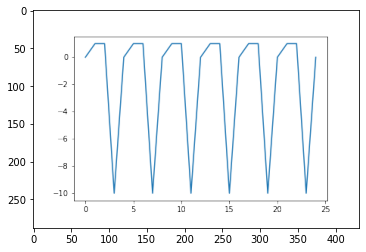

In [97]:
import io
io_buf = io.BytesIO()
fig.savefig(io_buf, format='raw', dpi=fig.dpi)
io_buf.seek(0)
img_arr = np.frombuffer(io_buf.getvalue(), dtype=np.uint8).reshape((int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
io_buf.close()
plt.imshow(img_arr)
img_arr.shape

In [82]:
newshape=(int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1)

In [83]:
newshape

(288, 432, -1)

In [94]:
497664/288/432

4.0

In [85]:
img_arr.shape

(8640000,)

In [87]:
fig.bbox.bounds

(0.0, 0.0, 432.0, 288.0)

In [92]:
fig.dpi

72.0